# Assignment 2: College Board

## 1. Brief:
<p>The College Board has engaged General Assembly & Associates to review SAT participation in the years following the updated format launched in 2016.</p>
<p> The College Board's purpose in engaging GA&A is in seeking recommendations for:
    <li>Where to spend money to improve SAT participation?</li>
    <li>How to improve SAT participation in one State of the analyst's choosing?</li></p>
<p>As the client, The College Board has provided all data relied upon in this analysis unless otherwise stated. For these purposes, the veracity of client data is assumed.</p>
<p>Data sets provided by TCB extend from 2017-19. As such, we have understood that a comparative analysis for the impact of the 2016 format change itself is out of scope as it would not be possible to compare participation changes that may have occured due to the format change.</p>


## 2. Method:
<p> In undertaking this analysis for TCB, GA&A have utilised the Python programming language due to its capabilities in Data Analytics and working with big data.</p>
<p> To deliver on the recommendations required by TCB, GA&A have undertaken the following steps:
    <ol>
    <li>Clean the data with rationale-backed handling of null or missing values.</li>
    <li>Join the data sets together into a single DataFrame.</li>
    <li>Correlate participation rates in SAT tests with other data points identified by our analyst. </li>
    <li>Explore and compare the chosen State's situation with others.</li>
    <li>Based on our analysis: Recommend how to increase participation in the chosen State.</li>
    </ol>

## 3. Data Cleaning:

In [148]:
#Import pandas exploratory data analysis package for python
import pandas as pd
#import numpy and matplotlib as redundancy
import numpy as np
import matplotlib as plt

### 3.1 Exploration of Client Data

In [149]:
#establish reads on dataframes provided by client
comp17 = pd.read_csv('./act_2017.csv') #creates dataframe from csv containing 2017 data from SAT competitor, ACT
comp18 = pd.read_csv('./act_2018.csv') #creates dataframe from csv containing 2018 data from SAT competitor, ACT
comp19 = pd.read_csv('./act_2019.csv') #creates dataframe from csv containing 2019 data from SAT competitor, ACT
comp19_cali = pd.read_csv('./act_2019_ca.csv') #creates dataframe from csv containing 2019 Californian data from SAT's competitor, ACT
sat17 = pd.read_csv('./sat_2017.csv') #creates dataframe from csv containing 2017 data from SAT
sat18 = pd.read_csv('./sat_2018.csv') #creates dataframe from csv containing 2018 data from SAT
sat19 = pd.read_csv('./sat_2019.csv') #creates dataframe from csv containing 2019 data from SAT
sat19_cali = pd.read_csv('./sat_2019_ca.csv') #creates dataframe from csv containing 2019 Californian data from SAT
sat19_major = pd.read_csv('./sat_2019_by_intended_college_major.csv') #creates dataframe from csv containing 2019 data from SAT regarding intended major
test_req_by_college_19 = pd.read_csv('./sat_act_by_college.csv') #creates dataframe from csv comparing test requirements by education institution

#### 3.1.1 ACT Data
The client has provided data relating to its competitor ACT. This section explores the data provided relating to ACT.

##### 3.1.1.1 ACT 2017 data

In [150]:
#explore imported dataframe
comp17.info()
comp17.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


<p> Dataframe comp17 appears to contain relevant data to the client's key questions. The dataframe shows no null values. The Particpation and Composite series contain numeric data yet are displaying the object data type and require cleaning.</p>

In [151]:
#removes percentage signs from specified series in specified dataframes in a list of dataframes.
def remove_percentage_signs_from_series(dataframes, columns=None):

    for dataframe in dataframes:
        if columns is None:
            columns = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
        for column in columns:
            try:
                dataframe[column] = dataframe[column].str.replace('%', '').astype('float')/100
            except ValueError:
                pass

In [152]:
#remove percentage signs from Participation
remove_percentage_signs_from_series([comp17],columns=['Participation'])

In [153]:
comp17.head(3)

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8


In [154]:
#cleans any non-numeric characters from a specified series in a specified dataframe.
def clean_numeric_data(dataframe, column):
    dataframe[column] = dataframe[column].str.replace(r'[^0-9.]', '', regex=True)
    dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')

In [155]:
clean_numeric_data(comp17,'Composite') #cleans 'x' from last item in series.
comp17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


##### 3.1.1.2 ACT 2018 data

In [156]:
#explores the competitor's 2018 dataframe.
comp18.info()
comp18.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2


Dataframe appears to be complete with no null values, however there is likely a duplicate as the dataframe contains 52 values but there appears to be no National value as with the 2017 data and the US has 51 States. Participation is again recorded as an object and requires cleaning to return an equivalent float.

In [157]:
#prints the duplicate row
print(comp18[comp18.duplicated()])

    State Participation  Composite
20  Maine            7%       24.0


In [158]:
#the duplicated content appears to be the data for the State of Maine. 
#Because the data appears twice in full we will drop this row. to clean the dataframe.
comp18 = comp18.drop_duplicates()
comp18.duplicated().sum()

0

In [159]:
#now we update 'Participation' from object to float
remove_percentage_signs_from_series([comp18],columns=['Participation'])

In [160]:
#check data to confirm
comp18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   Composite      51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


##### 3.1.1.3 ACT 2019 data

In [161]:
comp19.info()
comp19.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0


As with comp18, comp19 dataframe appears to be complete with no null values, however there is likely a duplicate as the dataframe contains 52 values but there appears to be no National value as with the 2017 data and the US has 51 States. Participation is again recorded as an object and requires cleaning to return an equivalent float.

In [162]:
#prints the duplicate row
print(comp19[comp19.duplicated()])

Empty DataFrame
Columns: [State, Participation, Composite]
Index: []


As no duplicates were found, we will check for a 'National' entry elsewhere in the dataframe.

In [163]:
#checks the last 5 entries.
comp19.tail()

,State,Participation,Composite
47,Washington,24%,22.1
48,West Virginia,49%,20.8
49,Wisconsin,100%,20.3
50,Wyoming,100%,19.8
51,National,52%,20.7


As a National field was found in the tail, the US has 50 States plus the District of Colombia (treated as a State in the set) to equal 51, and no duplicates were identified, we can accept the 52 entries as complete. We will now clean the Participation column to convert from object to float.

In [164]:
#now we update 'Participation' from object to float
remove_percentage_signs_from_series([comp19],columns=['Participation'])

In [165]:
#check data to confirm
comp19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


##### 3.1.1.4 ACT 2019 Californian data

In [166]:
comp19_cali.info()
comp19_cali.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN


While the Californian Competitor dataframe contains a number of missing values, the dataframe itself doesn't appear to contain data directly relevant to the engagement. Therefore, rather than cleaning the data within the dataframe, we have chosen to park this dataframe until such time as it is determined relevant.

#### 3.1.2 SAT Client Data

##### 3.1.2.1 SAT 2017 data

In [167]:
#Explores dataframe related to SAT 2017
sat17.info()
sat17.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116


In [168]:
#Exploratory analysis showed 51 data items with no 'National' field, just screening for duplicates for completeness
print(sat17[sat17.duplicated()])

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []


In [169]:
#now we update 'Participation' from object to float
remove_percentage_signs_from_series([sat17],columns=['Participation'])

In [170]:
#check data to confirm participation is now float
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


##### 3.1.2.2 SAT 2018 data

In [171]:
sat18.info()
sat18.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


In [172]:
#Exploration showed 51 entries and no null values. for completeness, we will check for duplicates.
print(sat18[sat18.duplicated()])

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []


In [173]:
#No duplicates were found. We will convert 'Participation' to a float.
remove_percentage_signs_from_series([sat18],columns=['Participation'])

In [174]:
#confirming conversion was successful
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


##### 3.1.2.3 SAT 2019 data

In [175]:
sat19.info()
sat19.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134


sat19 shows 53 entries, suggesting duplicates and/or a 'National' field may be included in the data. There are no null values identified.

In [176]:
#check for duplicates.
sat19.duplicated().sum()

0

In [177]:
#no duplicates were found, but the US holds a number of non-State territories that may be included in this dataset.
#to test, we'll compare sat19 to sat18 to see if any additional territories or districts have been added in 2019.
print(sat19[~sat19['State'].isin(sat18['State'])])

             State Participation Rate  EBRW  Math  Total
39     Puerto Rico                  —   483   462    944
47  Virgin Islands                  —   490   445    935


In [178]:
# Puerto Rico and Virgin Islands are legitimate US Territories on par with DC.
# However they have recorded no participation (the client's key focus) and do not appear in earlier SAT or competitor data.
# For these reasons, we will remove them from the dataframe.
sat19 = sat19.replace('—', np.nan).dropna()
sat19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [179]:
#With PR and VI cleaned from the dataframe, we will convert Participation Rate to a float.
remove_percentage_signs_from_series([sat19],columns=['Participation Rate'])
sat19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               51 non-null     object 
 1   Participation Rate  51 non-null     float64
 2   EBRW                51 non-null     int64  
 3   Math                51 non-null     int64  
 4   Total               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


##### 3.1.2.4 SAT 2019 Californian data

In [180]:
sat19_cali.info()
sat19_cali.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN


As with the Californian Competitor dataframe, the 2019 SAT Californian dataframe contains a number of missing values. However, as with the equivalent competitor dataframe, the 2019 SAT Californian dataframe itself doesn't appear to contain data directly relevant to the client's problem. Therefore, rather than cleaning the data within the dataframe, we have chosen to park this dataframe until such time as it is determined relevant.

In [181]:
sat19_major.info()
sat19_major.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504


Exploratory analysis of the SAT 2019 majors dataframe suggests that the data contained does not directly relate to the client challenge of identifying opportunities to improve participation on a State basis. We have chosen to park this dataframe until such time as it is determined relevant.

In [182]:
test_req_by_college_19.info()
test_req_by_college_19.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35


This data may be useful as we can use python to identify the home state of the university. Once the home state of the universities is identified, we can consider the impact of test requirements on partipation rates.

In [183]:
#import and set up Open Street Maps geocoder
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="GA&A")

def get_state(row):
    try:
        #The geolocator had trouble with a handful of schools. These rules catch those edge cases.
        school = row['School']
        if 'CUNY' in school or 'SUNY' in school or 'United States Merchant Maritime Academy' in school or 'Yeshiva University' in school or 'Marist College' in school or 'New School' in school:
            return 'New York'
        elif 'New Jersey' in school:
            return 'New Jersey'
        elif 'Trinity College (Hartford)' in school or 'University of Connecticut' in school or 'Fairfield University' in school:
            return 'Connecticut'
        elif 'Weber State' in school:
            return 'Utah'
        elif 'Queens University of Charlotte' in school:
            return 'North Carolina'
        elif 'Emerson College' in school:
            return 'Massachusetts'
        elif 'Franklin and Marshall College' in school or 'Washington and Jefferson College' in school:
            return 'Pennsylvania'
        elif 'Pepperdine University' in school or 'Thomas Aquinas College' in school:
            return 'California'
        elif 'University of Georgia' in school or 'Georgia Southern' in school:
            return 'Georgia'
        elif 'Luther College' in school:
            return 'Iowa'
        elif 'Northern Arizona' in school:
            return 'Arizona'
        elif 'University of Maine' in school:
            return 'Maine'
        elif 'Portland State' in school:
            return 'Oregon'
        elif 'University of Colorado' in school:
            return 'Colorado'
        #with edge cases addressed, we pass the remaining schools to the geocoder.
        else:
            location = geolocator.geocode(school, timeout=10)
            if location is not None:
                address = location.address
                if ',' in address:
                    state = address.split(',')[-3].strip()
                    if 'Connecticut' in state:
                        return 'Connecticut'
                    else:
                        return state
    #provides error handling
    except (AttributeError, GeocoderTimedOut):
        return None

#Stores States in the dataframe.
test_req_by_college_19['State'] = test_req_by_college_19.apply(get_state, axis=1)

In [184]:
test_req_by_college_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
 8   State                           416 non-null    object
dtypes: int64(1), object(8)
memory usage: 29.4+ KB


In [185]:
test_req_by_college_19.head(10)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile,State
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35,California
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35,Michigan
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35,New Jersey
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35,New York
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35,Connecticut
5,California Institute of Technology,Yes (TB),2021 2022,CalTech has adopted a two-year Test Blind poli...,8367,6.4%,​​ 1530-1560,35-36,California
6,Massachusetts Institute of Technology,Yes,2021,MIT has adopted a one-year test optional polic...,21706,6.7%,​​ 1500-1570,34-36,Massachusetts
7,Brown University,Yes,2021,Brown has adopted a one-year test optional pol...,38674,7.1%,​​ 1440-1570,33-35,Rhode Island
8,University of Chicago,Yes,All / Permanent Policy,UChicago offers a test optional policy which a...,32283,7.3%,​​ 1490-1570,33-35,Illinois
9,Pomona College,Yes,2021,Pomona College has adopted a one-year test opt...,10401,7.4%,1390-1540,32-35,California


In [186]:
#confirm nulls addressed.
print(test_req_by_college_19[test_req_by_college_19['State'].isnull()])

Empty DataFrame
Columns: [School, Test Optional?, Applies to Class Year(s), Policy Details, Number of Applicants, Accept Rate, SAT Total 25th-75th Percentile, ACT Total 25th-75th Percentile, State]
Index: []


In [187]:
test_req_by_college_19['State'].nunique()

52

In [188]:
test_req_by_college_19['State'].unique()

array(['California', 'Michigan', 'New Jersey', 'New York', 'Connecticut',
       'Massachusetts', 'Rhode Island', 'Illinois', 'Pennsylvania',
       'New Hampshire', 'Maine', 'North Carolina', 'Tennessee',
       'Maryland', 'Texas', 'Louisiana', 'Colorado',
       'District of Columbia', 'Missouri', 'Vermont', 'Indiana',
       'Georgia', 'Minnesota', 'Virginia', 'Iowa',
       'CAL Fire Contract Counties', 'Florida', 'Ohio', 'Kentucky',
       'Oregon', 'Oklahoma', 'New Mexico', 'South Carolina', 'Washington',
       'Wisconsin', 'Alabama', 'Hawaii', 'Mississippi', 'Utah',
       'Delaware', 'Arizona', 'Kansas', 'Nebraska', 'Arkansas', 'Idaho',
       'Montana', 'Nevada', 'North Dakota', 'West Virginia', 'Alaska',
       'South Dakota', 'Wyoming'], dtype=object)

In [189]:
# For the sake of completeness we have filled the null values in Applies to Class Year(s) with 'Current'.
# The null values all referred to Schools where testing was required (Test Optional? = 'No') and therefore we
# have nominally identified these policies as 'Current'.
# Based on past research in this area, our operating hypothesis is that a policy announcement has more impact than
# it's date of implementation when related to tertiary admissions. As such, we have parked a descriptive value in 
# place of nulls that we can convert later if we develop and alternative hypothesis requiring this data.
test_req_by_college_19['Applies to Class Year(s)'].fillna('Current')

0         2021
1         2021
2         2021
3         2021
4         2021
        ...   
411    Current
412    Current
413    Current
414    Current
415    Current
Name: Applies to Class Year(s), Length: 416, dtype: object

In [190]:
# Group the dataframe by 'State' and calculate the percentage of entries that were 'Yes' under 'Test Optional?'
state_optionality = test_req_by_college_19.groupby('State')['Test Optional?'].apply(lambda x: (x != 'No').mean())
state_optionality.name = 'Percent Insititutions Test Optional'
optional = pd.DataFrame(state_optionality)

optional.head(51)

,Percent Insititutions Test Optional
State,
Alabama,0.750000
Alaska,1.000000
Arizona,1.000000
Arkansas,1.000000
CAL Fire Contract Counties,1.000000
California,0.980000
Colorado,0.833333
Connecticut,1.000000
Delaware,1.000000


### 4.Joining Datasets
<p> Having identified and cleaned the relevant datasets, we will now join the primary participation related data.</p>

In [191]:
# function to rename the columns (other than State) in each participation data frame to 
# include the name of the original dataframe for identification post merger
def rename_fields(df, name):
    for col in df.columns:
        if col != 'State':
            new_col = col + '_' + name
            df = df.rename(columns={col: new_col})
    return df

comp17 = rename_fields(comp17,'comp17')
comp18 = rename_fields(comp18, 'comp18')
comp19 = rename_fields(comp19, 'comp19')
sat17 = rename_fields(sat17, 'sat17')
sat18 = rename_fields(sat18, 'sat18')
sat19 = rename_fields(sat19, 'sat19')

In [192]:
participation = pd.merge(comp17,comp18, how = 'left', left_on='State', right_on='State')
participation = pd.merge(participation, comp19, how = 'left', left_on='State', right_on='State')
participation = pd.merge(participation, sat17, how = 'left', left_on='State', right_on='State')
participation = pd.merge(participation, sat18, how = 'left', left_on='State', right_on='State')
participation = pd.merge(participation, sat19, how = 'left', left_on='State', right_on='State')
participation = pd.merge(participation, optional, how ='left', left_on='State', right_on='State')

In [193]:
participation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     52 non-null     object 
 1   Participation_comp17                      52 non-null     float64
 2   English_comp17                            52 non-null     float64
 3   Math_comp17                               52 non-null     float64
 4   Reading_comp17                            52 non-null     float64
 5   Science_comp17                            52 non-null     float64
 6   Composite_comp17                          52 non-null     float64
 7   Participation_comp18                      50 non-null     float64
 8   Composite_comp18                          50 non-null     float64
 9   Participation_comp19                      52 non-null     float64
 10  Composite_comp19                        

In [194]:
participation.head()

,State,Participation_comp17,English_comp17,Math_comp17,Reading_comp17,Science_comp17,Composite_comp17,Participation_comp18,Composite_comp18,Participation_comp19,...,Total_sat17,Participation_sat18,Evidence-Based Reading and Writing_sat18,Math_sat18,Total_sat18,Participation Rate_sat19,EBRW_sat19,Math_sat19,Total_sat19,Percent Insititutions Test Optional
0,National,0.60,20.3,20.7,21.4,21.0,21.0,NaN,NaN,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,1.00,19.1,1.00,...,1165.0,0.06,595.0,571.0,1166.0,0.07,583.0,560.0,1143.0,0.75
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.33,20.8,0.38,...,1080.0,0.43,562.0,544.0,1106.0,0.41,556.0,541.0,1097.0,1.00
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.66,19.2,0.73,...,1116.0,0.29,577.0,572.0,1149.0,0.31,569.0,565.0,1134.0,1.00
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,1.00,19.4,1.00,...,1208.0,0.05,592.0,576.0,1169.0,0.06,582.0,559.0,1141.0,1.00


In [195]:
#In our joined up dataframe, the 'National' data appears only for 2017 and 2019 competitor data, so has been dropped.
participation = participation.drop(0)
participation.head()

,State,Participation_comp17,English_comp17,Math_comp17,Reading_comp17,Science_comp17,Composite_comp17,Participation_comp18,Composite_comp18,Participation_comp19,...,Total_sat17,Participation_sat18,Evidence-Based Reading and Writing_sat18,Math_sat18,Total_sat18,Participation Rate_sat19,EBRW_sat19,Math_sat19,Total_sat19,Percent Insititutions Test Optional
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,1.00,19.1,1.00,...,1165.0,0.06,595.0,571.0,1166.0,0.07,583.0,560.0,1143.0,0.75
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.33,20.8,0.38,...,1080.0,0.43,562.0,544.0,1106.0,0.41,556.0,541.0,1097.0,1.00
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.66,19.2,0.73,...,1116.0,0.29,577.0,572.0,1149.0,0.31,569.0,565.0,1134.0,1.00
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,1.00,19.4,1.00,...,1208.0,0.05,592.0,576.0,1169.0,0.06,582.0,559.0,1141.0,1.00
5,California,0.31,22.5,22.7,23.1,22.2,22.8,0.27,22.7,0.23,...,1055.0,0.60,540.0,536.0,1076.0,0.63,534.0,531.0,1065.0,0.98


In [196]:
participation.tail()

,State,Participation_comp17,English_comp17,Math_comp17,Reading_comp17,Science_comp17,Composite_comp17,Participation_comp18,Composite_comp18,Participation_comp19,...,Total_sat17,Participation_sat18,Evidence-Based Reading and Writing_sat18,Math_sat18,Total_sat18,Participation Rate_sat19,EBRW_sat19,Math_sat19,Total_sat19,Percent Insititutions Test Optional
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8,0.24,23.9,0.21,...,1102.0,0.68,567.0,550.0,1117.0,0.68,567.0,551.0,1119.0,1.000000
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9,0.24,22.2,0.24,...,1075.0,0.69,543.0,538.0,1081.0,0.70,539.0,535.0,1074.0,1.000000
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4,0.65,20.3,0.49,...,1086.0,0.28,513.0,486.0,999.0,0.99,483.0,460.0,943.0,1.000000
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,1.00,20.5,1.00,...,1291.0,0.03,641.0,653.0,1294.0,0.03,635.0,648.0,1283.0,0.857143
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,1.00,20.0,1.00,...,1230.0,0.03,633.0,625.0,1257.0,0.03,623.0,615.0,1238.0,0.000000


In [197]:
#There are also some null fields in comp18 where one State appears to have not been included. 
# We will fill these with their equivalent median participation based on 2017 and 2019 data.
median_comp = participation[['Participation_comp17', 'Participation_comp19']].median(axis=1)
participation['Participation_comp18'].fillna(median_comp, inplace=True)
print(participation['Participation_comp18'].isnull().sum())

0


### 5. Correlate participation rates in SAT tests with other data points identified.
<p> With the single dataframe <b>'participation'</b> created, we will correlate SAT participation rates with other data points identified, including:</p>
<li> Contemporary ACT participation rates </li>
<li> Percentage of major Schools in the State that do not require test scores such as SAT or ACT</li>

/Users/michael/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.02, 1.0, 'Correlation = -0.84')

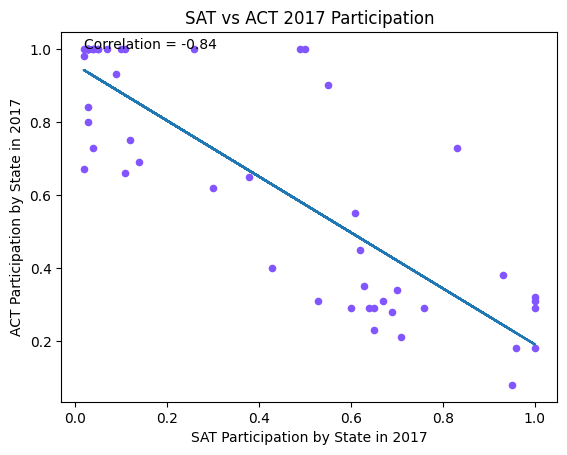

In [198]:
part17 = participation.plot(kind="scatter", x="Participation_sat17", y="Participation_comp17", xlabel='SAT Participation by State in 2017', ylabel='ACT Participation by State in 2017', title="SAT vs ACT 2017 Participation", c='#8255ff')
# add a linear trend line to the plot
z = np.polyfit(participation["Participation_sat17"], participation["Participation_comp17"], 1)
p = np.poly1d(z)
part17.plot(participation["Participation_sat17"], p(participation["Participation_sat17"]))

# add correlation coefficient to the plot
corr_coef = participation[["Participation_sat17", "Participation_comp17"]].corr().iloc[0,1]
part17.text(participation["Participation_sat17"].min(), participation["Participation_comp17"].max(), f'Correlation = {corr_coef:.2f}', fontsize=10)


/Users/michael/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.02, 1.0, 'Correlation = -0.87')

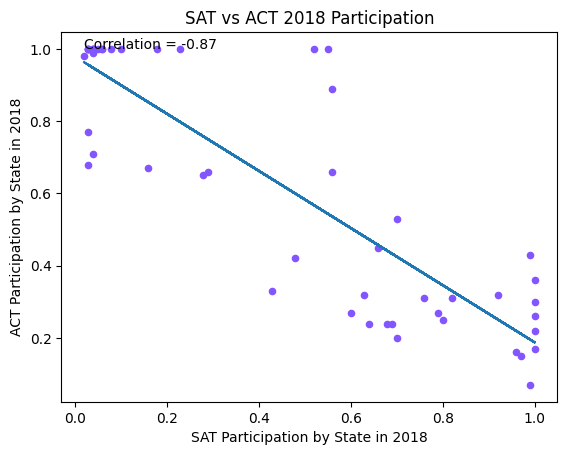

In [199]:
part18 = participation.plot(kind="scatter", x="Participation_sat18", y="Participation_comp18", xlabel='SAT Participation by State in 2018', ylabel='ACT Participation by State in 2018', title="SAT vs ACT 2018 Participation", c='#8255ff')
z = np.polyfit(participation["Participation_sat18"], participation["Participation_comp18"], 1)
p = np.poly1d(z)
part18.plot(participation["Participation_sat18"], p(participation["Participation_sat18"]))

# add correlation coefficient to the plot
corr_coef = participation[["Participation_sat18", "Participation_comp18"]].corr().iloc[0,1]
part18.text(participation["Participation_sat18"].min(), participation["Participation_comp18"].max(), f'Correlation = {corr_coef:.2f}', fontsize=10)


/Users/michael/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.02, 1.0, 'Correlation = -0.87')

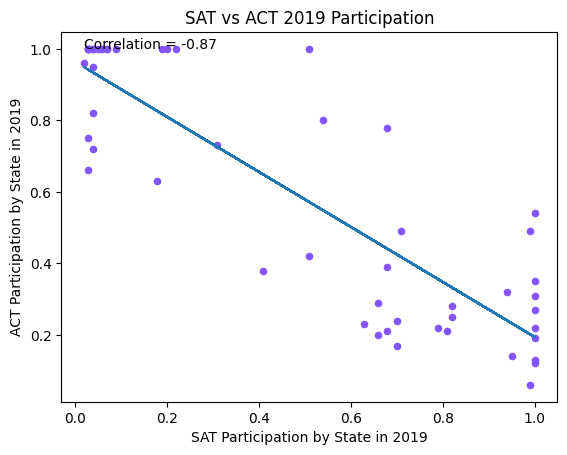

In [200]:
part19 = participation.plot(kind="scatter", x="Participation Rate_sat19", y="Participation_comp19", xlabel='SAT Participation by State in 2019', ylabel='ACT Participation by State in 2019', title="SAT vs ACT 2019 Participation", c='#8255ff')
z = np.polyfit(participation["Participation Rate_sat19"], participation["Participation_comp19"], 1)
p = np.poly1d(z)
part19.plot(participation["Participation Rate_sat19"], p(participation["Participation Rate_sat19"]))

# add correlation coefficient to the plot
corr_coef = participation[["Participation Rate_sat19", "Participation_comp19"]].corr().iloc[0,1]
part19.text(participation["Participation Rate_sat19"].min(), participation["Participation_comp19"].max(), f'Correlation = {corr_coef:.2f}', fontsize=10)


<p>In comparing the scatter plots and their linear trend lines, the data has shown a <b>strong negative correlation</b> between participation in the SAT and participation in the ACT. In 2017 this was a negative correlation of -0.84, and this increased to -0.87 in 2018 and 2019.</p>
<p> This suggests that State's may have a strong preference for one exam or the other. For The College Board, this means that they may need to pursue a competitive strategy in winning State's over from the ACT.</p>


/Users/michael/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.02, 1.0, 'Correlation = 0.15')

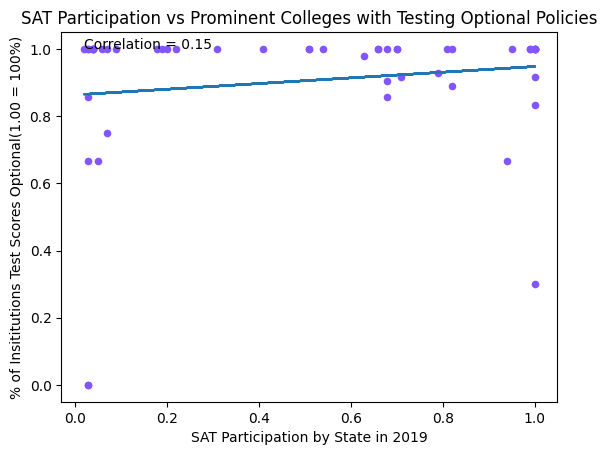

In [201]:
part19 = participation.plot(kind="scatter", x="Participation Rate_sat19", y="Percent Insititutions Test Optional", xlabel='SAT Participation by State in 2019', ylabel='% of Insititutions Test Scores Optional(1.00 = 100%)', title="SAT Participation vs Prominent Colleges with Testing Optional Policies", c='#8255ff')
z = np.polyfit(participation["Participation Rate_sat19"], participation["Percent Insititutions Test Optional"], 1)
p = np.poly1d(z)
part19.plot(participation["Participation Rate_sat19"], p(participation["Participation Rate_sat19"]))

# add correlation coefficient to the plot
corr_coef = participation.corr().loc["Participation Rate_sat19", "Percent Insititutions Test Optional"]
part19.text(participation["Participation Rate_sat19"].min(), participation["Percent Insititutions Test Optional"].max(), f'Correlation = {corr_coef:.2f}', fontsize=10)


<p>The above graph compares SAT participation in 2019 to the percentage of Prominent Colleges in each State where Testing is not required in the admission process. It generated a <b>weak positive corelation of 0.14</b>. While there is some consideration around the data, with the Testing Optional policies relating to a range of class years including 2019. This data suggests there may not be a major impact on the testing policies of a State's prominent colleges and the level of SAT participation in that State.</p>
<p>For the College Board, this means investing in activities that promote colleges to adopt policies requiring applicants to complete testing may not deliver returns in terms of the increased participation rates sought.</p>

### 6. Explore and compare the chosen State's situation with others.
<p>For the purposes of further investigation, we have chosen <b>Alabama</b> for further investigation. Alabama is a southern US state and has among the lowest SAT participation in the country...but it has been growing!</p>

Text(0, 0.5, 'Year')

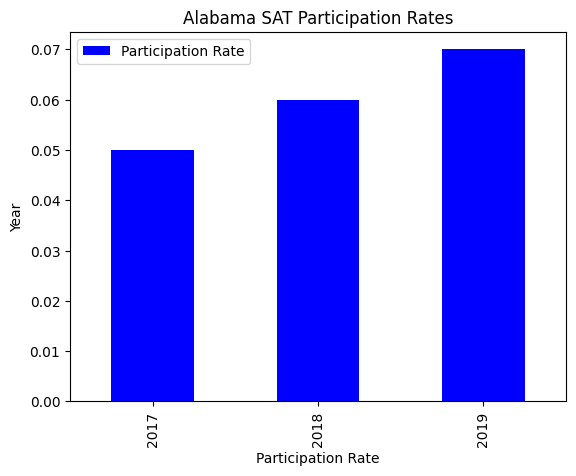

In [202]:
# Select the rows where the 'State' column is 'Alabama'
alabama_data = participation[participation['State'] == 'Alabama']

# Extract the participation rates for the three years
sat17_participation = alabama_data['Participation_sat17'].values[0]
sat18_participation = alabama_data['Participation_sat18'].values[0]
sat19_participation = alabama_data['Participation Rate_sat19'].values[0]

# Create a new dataframe with just the participation rates for Alabama
alabama_sat_frame = pd.DataFrame({'Year': ['2017', '2018', '2019'],
                     'Participation Rate': [sat17_participation, sat18_participation, sat19_participation]})

# Create the horizontal bar chart
ax = alabama_sat_frame.plot.bar(x='Year', y='Participation Rate', color='blue')
ax.set_title('Alabama SAT Participation Rates')
ax.set_xlabel('Participation Rate')
ax.set_ylabel('Year')

Text(0, 0.5, 'Year')

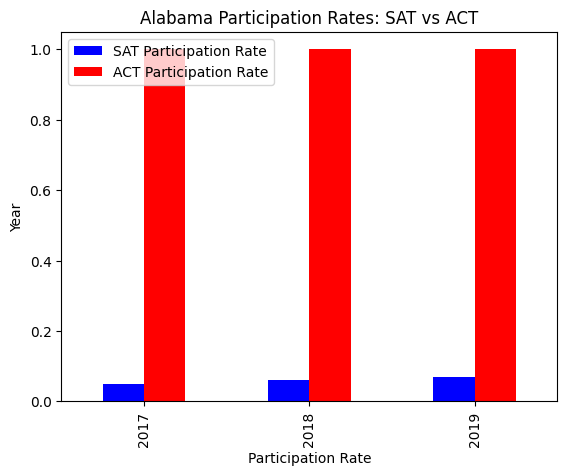

In [203]:
# Extract the participation rates for the three years
act17_participation = alabama_data['Participation_comp17'].values[0]
act18_participation = alabama_data['Participation_comp18'].values[0]
act19_participation = alabama_data['Participation_comp19'].values[0]

# Create a new dataframe with just the participation rates for Alabama
alabama_both_frame = pd.DataFrame({'Year': ['2017', '2018', '2019'],
                     'SAT Participation Rate': [sat17_participation, sat18_participation, sat19_participation],
                        'ACT Participation Rate':[act17_participation, act18_participation, act19_participation]})

# Create the horizontal bar chart
ax = alabama_both_frame.plot.bar(x='Year', y=['SAT Participation Rate', 'ACT Participation Rate'], color=['blue','red'])
ax.set_title('Alabama Participation Rates: SAT vs ACT')
ax.set_xlabel('Participation Rate')
ax.set_ylabel('Year')

However, while SAT has increased participation by 1% each year from 2017 to 2019, we can see that the participation rates for the competitor, ACT, are consistently much higher at 100%.

Text(-88.2, 22.3, 'Alabama: 0.05')

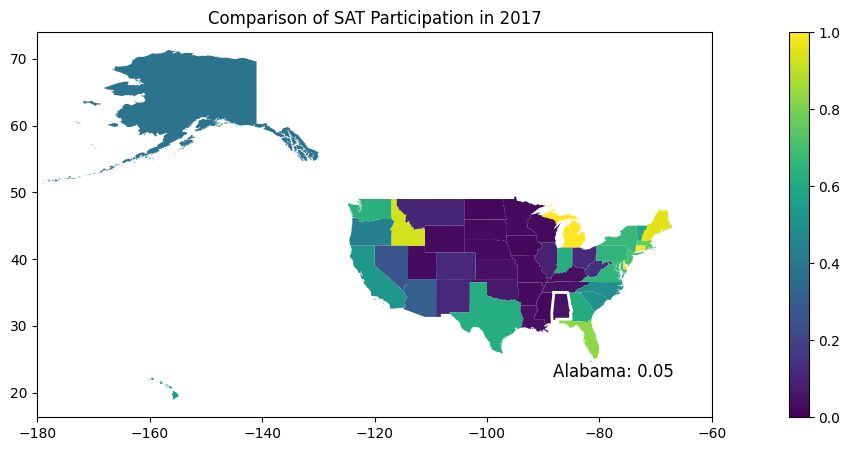

In [204]:
import geopandas as gpd

# Load the shapefile
us_states = gpd.read_file('cb_2021_us_state_500k.shp')

# Merge with the participation DataFrame

participation_map = us_states.merge(participation, left_on='NAME', right_on='State')

# Creates GeoDataFrame with just Alabama
alabama = us_states[us_states['NAME'] == 'Alabama']


#creates cmap
ax = participation_map.plot(column='Participation_sat17', legend=True, figsize=(20,5), vmin=0, vmax=1)
ax.set_xlim([-180, -60])
ax.set_title('Comparison of SAT Participation in 2017')

# Outlines Alabama
alabama.plot(ax=ax, edgecolor='#fff', linewidth=2, facecolor='none')

# Annotate the map with the value for Alabama
alabama_value = participation_map.loc[participation_map['NAME'] == 'Alabama', 'Participation_sat17'].values[0]
ax.annotate(f'Alabama: {alabama_value}', xy=(-88.2, 22.3), xycoords='data', color='black', fontsize=12)

Text(-88.2, 22.3, 'Alabama: 0.06')

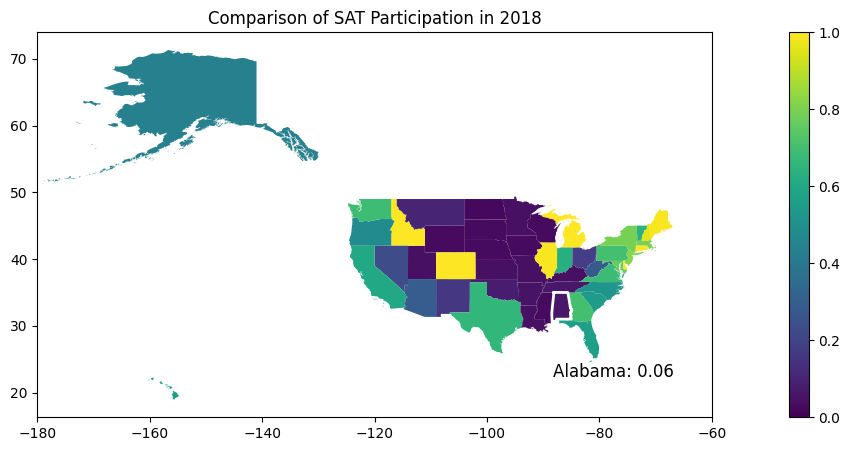

In [205]:
#create SAT 2018 participation cmap
ax = participation_map.plot(column='Participation_sat18', legend=True, figsize=(20,5), vmin=0, vmax=1)
ax.set_xlim([-180, -60])
ax.set_title('Comparison of SAT Participation in 2018')
# Outlines Alabama
alabama.plot(ax=ax, edgecolor='#fff', linewidth=2, facecolor='none')
# Annotate the map with the value for Alabama
alabama_value = participation_map.loc[participation_map['NAME'] == 'Alabama', 'Participation_sat18'].values[0]
ax.annotate(f'Alabama: {alabama_value}', xy=(-88.2, 22.3), xycoords='data', color='black', fontsize=12)

Text(-88.2, 22.3, 'Alabama: 0.07')

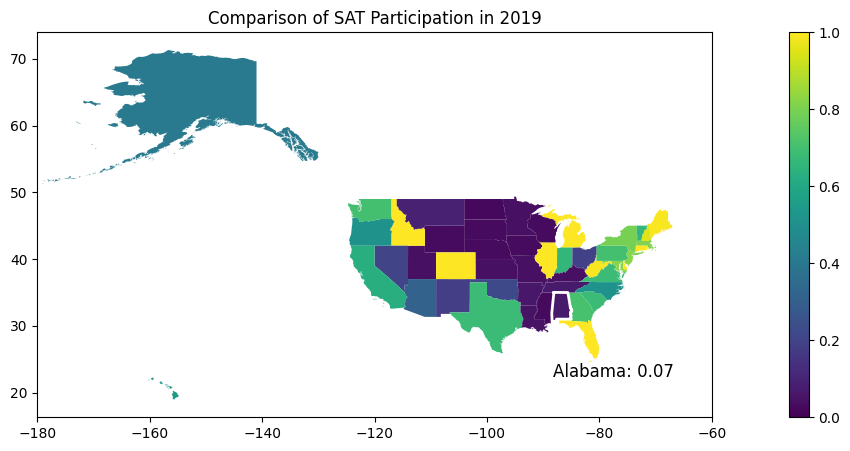

In [206]:
#2019 SAT Participation cmap
ax = participation_map.plot(column=('Participation Rate_sat19'), legend=True, figsize=(20,5), vmin=0, vmax=1.0)
ax.set_xlim([-180, -60])
ax.set_title('Comparison of SAT Participation in 2019')
# Outlines Alabama
alabama.plot(ax=ax, edgecolor='#fff', linewidth=2, facecolor='none')
# Annotate the map with the value for Alabama
alabama_value = participation_map.loc[participation_map['NAME'] == 'Alabama', 'Participation Rate_sat19'].values[0]
ax.annotate(f'Alabama: {alabama_value}', xy=(-88.2, 22.3), xycoords='data', color='black', fontsize=12)

These geographic maps were intended to show that Alabama's low participation in SAT was a common trait it shared with it's peers across the south and mid-west. In this case the graphs have coloured Alabama much darker than intended and this will require further investigation. The values appear to be correct on annotation and other States appear to be showing accurately. When viewing in this context, it is clear that the SAT garners low participation across the south and mid-west, while remaing rlatively popular around the US coasts. The notable exception is Colorado, which switches teams from ACT to SAT in 2018.

In [207]:
#double checking to confirm values are correct in dataframe
print(participation_map['Participation_sat17'].loc[participation_map['NAME'] == 'Alabama'])
print(participation_map['Participation_sat18'].loc[participation_map['NAME'] == 'Alabama'])
print(participation_map['Participation Rate_sat19'].loc[participation_map['NAME'] == 'Alabama'])
print(participation_map['Participation_comp17'].loc[participation_map['NAME'] == 'Alabama'])
print(participation_map['Participation_comp18'].loc[participation_map['NAME'] == 'Alabama'])
print(participation_map['Participation_comp19'].loc[participation_map['NAME'] == 'Alabama'])

32    0.05
Name: Participation_sat17, dtype: float64
32    0.06
Name: Participation_sat18, dtype: float64
32    0.07
Name: Participation Rate_sat19, dtype: float64
32    1.0
Name: Participation_comp17, dtype: float64
32    1.0
Name: Participation_comp18, dtype: float64
32    1.0
Name: Participation_comp19, dtype: float64


Text(-88.2, 22.3, 'Alabama: 1.0')

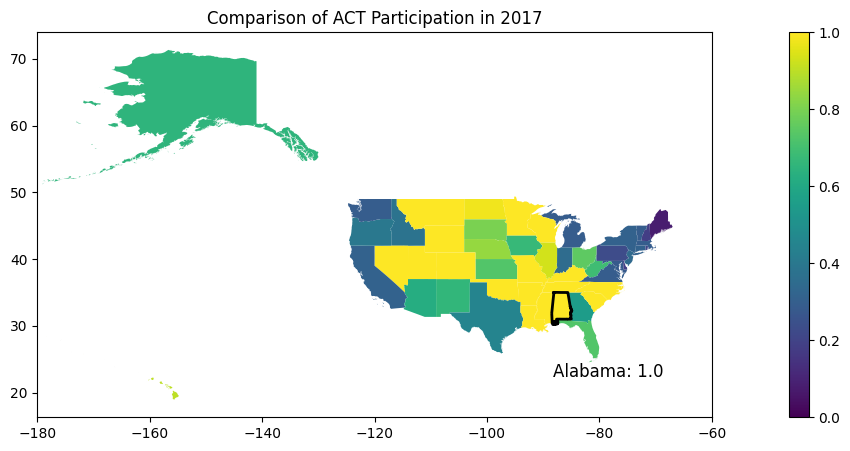

In [208]:
# ACT Participation 2017

ax = participation_map.plot(column='Participation_comp17', legend=True, figsize=(20,5), vmin=0, vmax=1)
ax.set_xlim([-180, -60])
ax.set_title('Comparison of ACT Participation in 2017')
# Outlines Alabama
alabama.plot(ax=ax, edgecolor='000', linewidth=2, facecolor='none')
# Annotate the map with the value for Alabama
alabama_value = participation_map.loc[participation_map['NAME'] == 'Alabama', 'Participation_comp17'].values[0]
ax.annotate(f'Alabama: {alabama_value}', xy=(-88.2, 22.3), xycoords='data', color='black', fontsize=12)

Text(-88.2, 22.3, 'Alabama: 1.0')

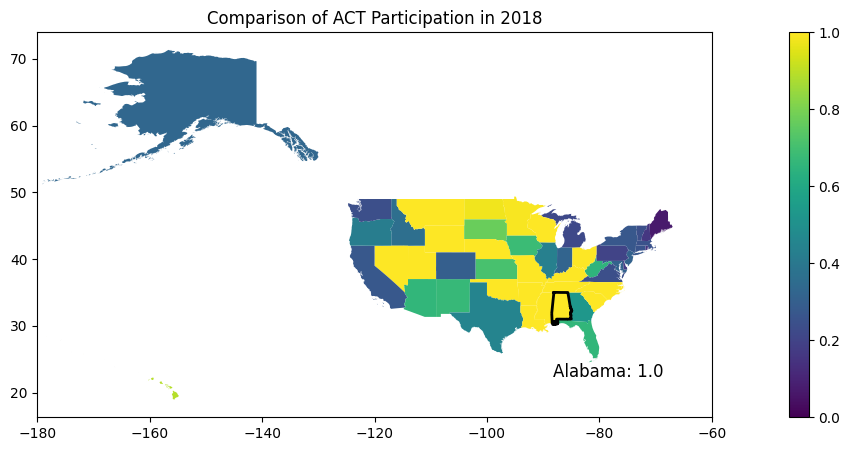

In [209]:
#2018 ACT participation cmap
ax = participation_map.plot(column='Participation_comp18', legend=True, figsize=(20,5), vmin=0, vmax=1)
ax.set_xlim([-180, -60])
ax.set_title('Comparison of ACT Participation in 2018')
# Outlines Alabama
alabama.plot(ax=ax, edgecolor='#000', linewidth=2, facecolor='none')
# Annotate the map with the value for Alabama
alabama_value = participation_map.loc[participation_map['NAME'] == 'Alabama', 'Participation_comp18'].values[0]
ax.annotate(f'Alabama: {alabama_value}', xy=(-88.2, 22.3), xycoords='data', color='black', fontsize=12)

Text(-88.2, 22.3, 'Alabama: 1.0')

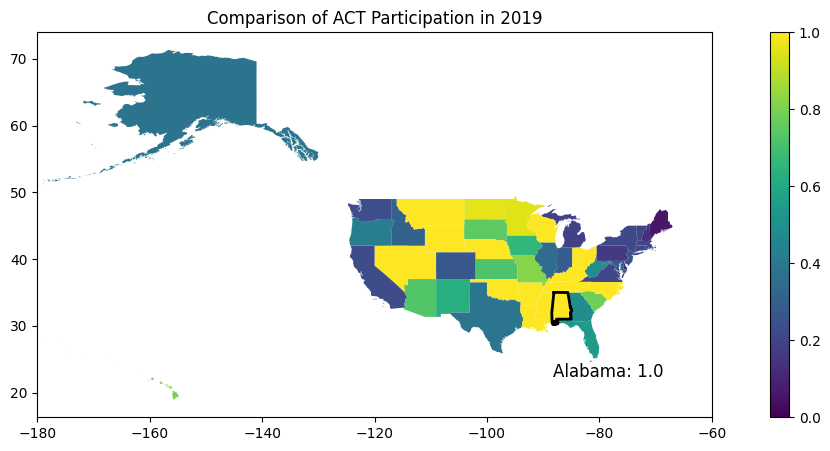

In [210]:
#ACT 2019 Participation map
ax = participation_map.plot(column='Participation_comp19', legend=True, figsize=(15,5), vmin=0, vmax=1)
ax.set_xlim([-180, -60])
ax.set_title('Comparison of ACT Participation in 2019')
# Outlines Alabama
alabama.plot(ax=ax, edgecolor='#000', linewidth=2, facecolor='none')
# Annotate the map with the value for Alabama
alabama_value = participation_map.loc[participation_map['NAME'] == 'Alabama', 'Participation_comp19'].values[0]
ax.annotate(f'Alabama: {alabama_value}', xy=(-88.2, 22.3), xycoords='data', color='black', fontsize=12)

<p>ACT appears to largely hold strong in it's high participation rates across southern and mid western states. The notable exception based on the mapping is when ACT's participation rates in Colorado fall in 2018 and 19, creating a break in ACT's geographies of dominance.</p>
<p>Colorado switched from the ACT to the SAT as the statewide college entrance exam in 2018. The Colorado Department of Education made the decision to switch to the SAT in 2015, citing reasons such as cost, alignment with state academic standards, and the fact that the SAT offers free test-taking opportunities for all Colorado juniors.</p>

### 7. Recommendations
#### 7.1 General Recommendations
<p> Our analysis has shown that State's have a strong preference for SAT or ACT. State mandated testing is likely a key driver behind the high levels of participation (100%) in some States. Investing in engaging with State based regulators with a view to helping regulators and legislators understand the value of the SAT may have particular benefit to increasing participation.</p>
<p> SAT has shown it can outperform ACT in a competitive tender that allowed it to unseat ACT as the official test of Colorado. The College Board has shown investing in meeting the needs of educators, regulators, legislators, parents and students in the mid-west can pay dividends in converting major gains. Colorado went from SAT participation of 11% in 2017 to 100% in 2018.</p>
<p>It is also worth noting that despite losing its crown as the official test of Colorado, the ACT maintained participation Rates above 25% in 2018 and 2019. This suggests that there is slower attrition when losing official test status in a State. To that end, when incumbents lose, their lose may not be as big as the challenger's gains. This may be further motivation for the College Board to consider a more competitive strategy.</p>
<p> Based on the data, the SAT appears to have stronger participation in coastal areas of the US and appears to be less popular in the Midwest and South compared to the ACT. At a general level, The College Board may consider targeting these regions for growth, in particular by providing greater access to the SAT. This may be done through increasing the number of testing centres in these regions and/or the frequency the SAT is available in these regions.<p>


#### 7.2 Alabama Recommendations
<p>Alabama consistently held a 100% participation rate for the ACT from 2017-2019. On this basis we can be confident that Alabamans are willing and able to engage in college entry testing. The SAT's concurrent lower participation of 5-7% shows that there is opportunity for the SAT to improve in the State and the incremental delivery of 1% participation increases each year through the period shows that even in a State with 100% ACT participation, the SAT can grow. </p>
<p> Based on our engagement, we are confident the College Board is not willing rest on its laurels and wait 93 years to catch up to the ACT in Alabama at 1% per year. While the College Board's tactics in Alabama are delivering year-on-year improvements, to truly challenge the ACT in Alabama will likely require a significant investment in the State. </p>
<p> SAT has shown in Colorado that it can win in a competitive tender. Should such a tender opportunity become available, The College Board should pursue it.</p>
<p>The ACT benefits from a mandated requirement in Alabama. Taking over as the official test would be the ideal way to gaining a 100% participation rate in the State. In the near term, a more achievable goal may be to engage with parents groups, educators, regulators and legislators around a position of personal/parental choice in seeking to open Alabama's requirements to allow parents and students to choose the test that is right for them - that is, encourage the maintenance of the testing requirement, and promote the right for participants to choose the test they participate in. This could be a matter of 'Freedom', 'State's Right's', and 'Family'.</p>
<p> This approach, along with increasing testing centres, increasing the frequency of testing availability, growing teacher training on the SAT and potentially adapting the SAT to better incorporate the testing needs and preferences of Alabamans, may give the College Board the necessary platform to build growth in the State and achieve a competitive market share - within the lifetime of the current board members.</p>